In [1]:
!pip install lime

In [2]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
import lime
from lime import lime_image
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

#tf.config.experimental_run_functions_eagerly(True)



2024-02-17 17:37:15.994585: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-17 17:37:15.994833: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-17 17:37:16.159864: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
model = keras.models.load_model('/kaggle/input/softmax_cnn_fakes/keras/model_dfake-face_softmax/1/model_dfake-face_softmax.h5')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 4)       112       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 4)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        592       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 16)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 32, 32, 16)        64    

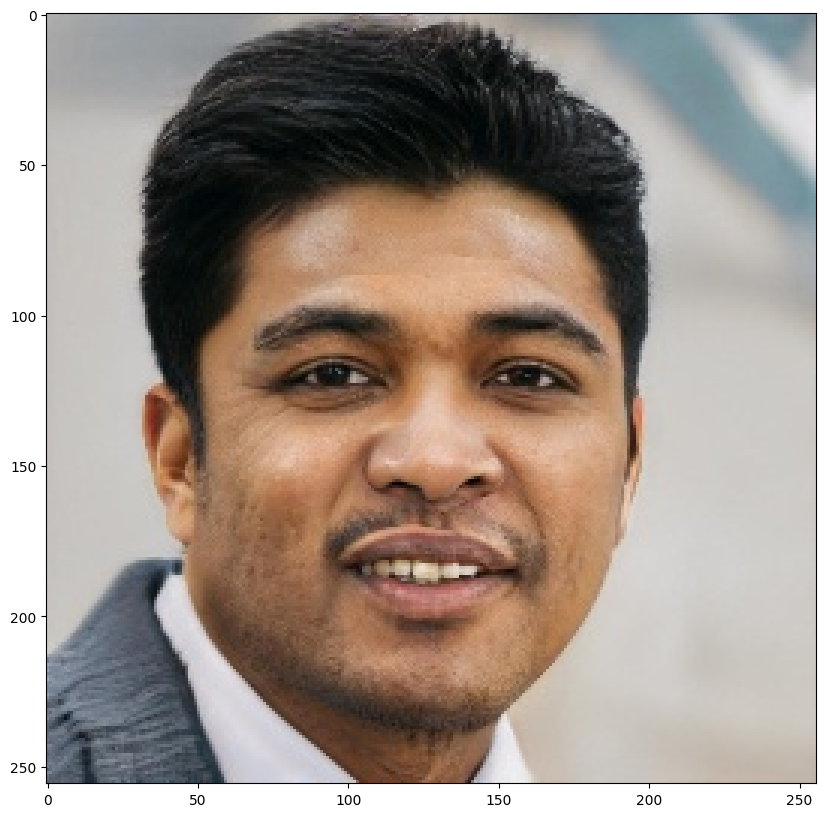

In [9]:
plt.figure(figsize = (14,10))
plt.imshow(plt.imread("/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/fake/02P1HEQ0GB.jpg"))

In [10]:
img = img = cv2.imread("/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/fake/02P1HEQ0GB.jpg")
img = cv2.resize(img,(128,128))
img = np.array(img)
data = img.reshape((128,128,3))

In [11]:
data.shape

(128, 128, 3)

In [12]:
model.predict(data.reshape(-1,128,128,3))

1/1 [==============================] - 0s 30ms/step


array([[9.9966836e-01, 3.3160439e-04]], dtype=float32)

In [13]:
explainer = lime_image.LimeImageExplainer()

In [14]:
explanation = explainer.explain_instance(data, model.predict,  
                                         top_labels=2, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 42ms/step


(-0.5, 127.5, 127.5, -0.5)

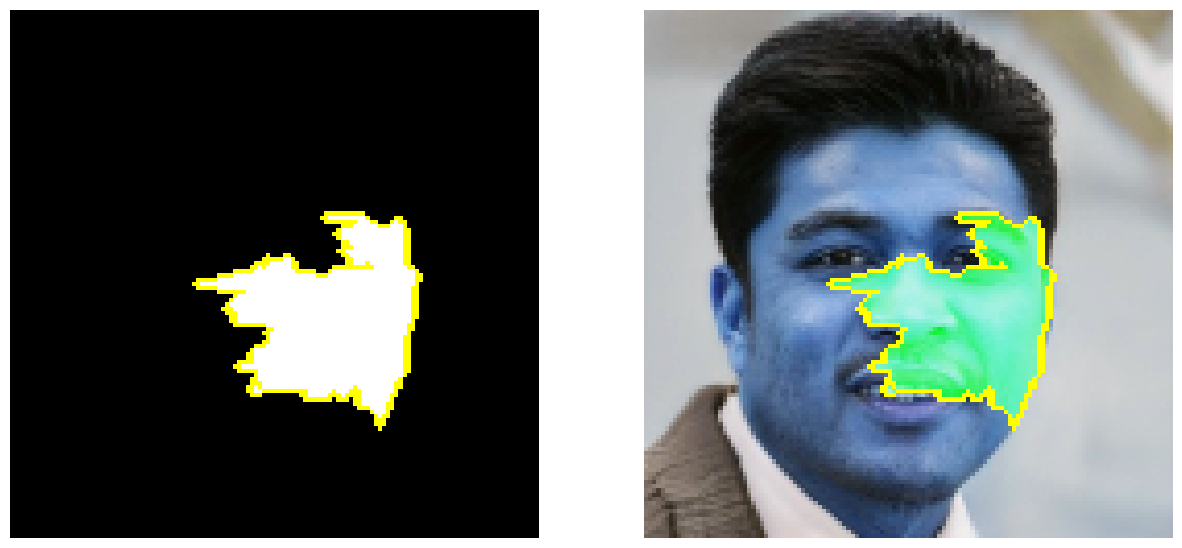

In [15]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=2, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=2, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')